In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# task 1

In [2]:
def r(s):
    beta0=0.0408
    beta1=-0.0396
    beta2=-0.0511
    tau=1.614
    
    rate=beta0+beta1*tau/s*(1-np.exp(-s/tau))+beta2*(tau/s*(1-np.exp(-s/tau))-np.exp(-s/tau))
    return rate

In [3]:
def z(s):
    if s==0:
        return 1
    return np.exp(-r(s)*s)

In [4]:
from datetime import datetime, timedelta

def adjust_for_weekend(date):
    if date.weekday() == 5:
        return date + timedelta(days=2)
    elif date.weekday() == 6:
        return date + timedelta(days=1)
    else:
        return date

start_date = datetime(2014, 2, 28)
payment_dates=[]
for year in range(2014,2045):
    for month in [3,6,9,12]:
        d=20
        payment_dates.append(datetime(year,month,d))

adjusted_dates = [adjust_for_weekend(date) for date in payment_dates]

years_diff = [(date - start_date).days/360 for date in adjusted_dates]

In [5]:
ttm=years_diff

discount=[z(i) for i in ttm]

Text(0, 0.5, 'discount factor')

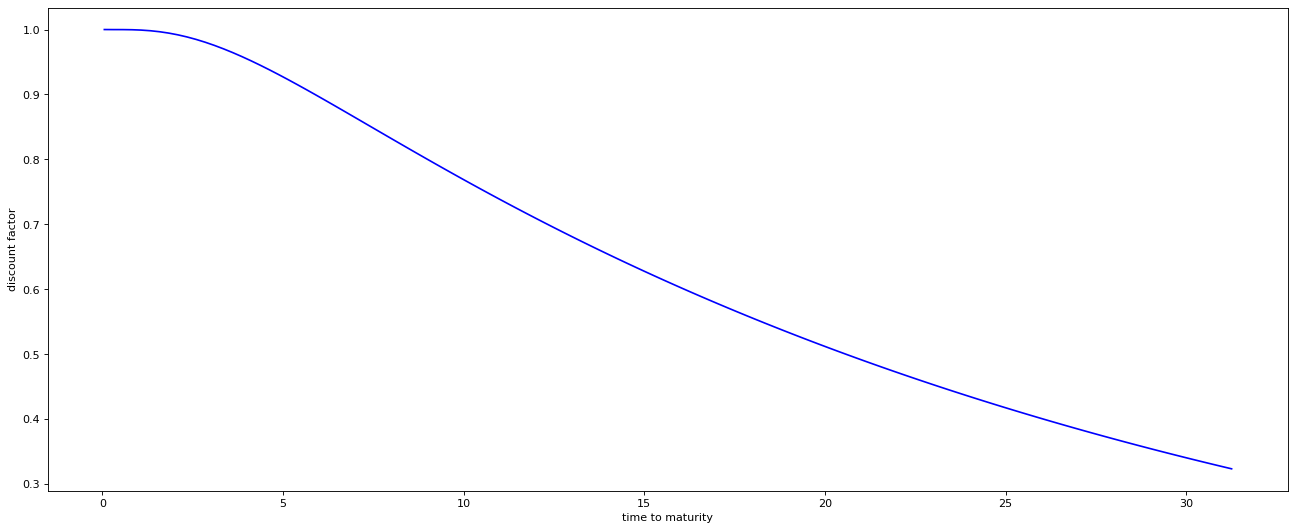

In [6]:
plt.figure(figsize=(20,8),dpi=80)

plt.plot(ttm,discount,'b')

plt.xlabel("time to maturity")
plt.ylabel("discount factor")

# task 2

T1

In [7]:
def Q(t,h):
    return np.exp(-t*h)

In [8]:
def dQ(t,h):
    return -t*Q(t,h)

In [9]:
R_standard=0.45
R_non_standard=0.6
m=12
raw_market_ttm=[datetime(2014,9,20)]
for year in [2015,2016,2017,2018,2019,2021,2024,2034,2044]:
    raw_market_ttm.append(datetime(year,3,20))
market_adjusted=[adjust_for_weekend(date) for date in raw_market_ttm]

market_ttm=[(date - start_date).days/360 for date in market_adjusted]

K=[int(np.ceil(m*x)) for x in market_ttm]
S= [x/10000 for x in [103.07,104.68,106.74,110.31,113.38,116.98,128.78,143.51,159.43,164.13]]

In [10]:
ttm[:10]

[0.05555555555555555,
 0.3111111111111111,
 0.5722222222222222,
 0.825,
 1.0694444444444444,
 1.3305555555555555,
 1.5833333333333333,
 1.836111111111111,
 2.088888888888889,
 2.341666666666667]

In [11]:
def V(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q(s1,x)-Q(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    #print(t_current)
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q(t_current[i-1],x)+Q(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

In [12]:
def dV(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ(s1,x)-dQ(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ(t_current[i-1],x)+dQ(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

In [13]:
def NR(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V(x,no))<eps:
            return x
        x=x-V(x,no)/dV(x,no)

In [14]:
h1=NR(0)
h1

0.018739616818661795

In [15]:
def Q2(t,h):
    if t<=market_ttm[0]:
        return Q(t,h1)
    return Q(market_ttm[0],h1)*np.exp(-(t-market_ttm[0])*h)

def dQ2(t,h):
    if t<=market_ttm[0]:
        return 0
    return -(t-market_ttm[0])*Q2(t,h)

def V2(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q2(s1,x)-Q2(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q2(t_current[i-1],x)+Q2(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

def dV2(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ2(s1,x)-dQ2(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ2(t_current[i-1],x)+dQ2(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem

def NR2(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V2(x,no))<eps:
            return x
        x=x-V2(x,no)/dV2(x,no)

In [16]:
h2=NR2(1)
h2

0.019369333650527797

T3

In [17]:
def Q3(t,h):
    if t<=market_ttm[1]:
        return Q2(t,h2)
    return Q2(market_ttm[1],h2)*np.exp(-(t-market_ttm[1])*h)

def dQ3(t,h):
    if t<=market_ttm[1]:
        return 0
    return -(t-market_ttm[1])*Q3(t,h)

def V3(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q3(s1,x)-Q3(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q3(t_current[i-1],x)+Q3(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

def dV3(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ3(s1,x)-dQ3(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ3(t_current[i-1],x)+dQ3(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem

def NR3(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V3(x,no))<eps:
            return x
        x=x-V3(x,no)/dV3(x,no)

In [18]:
h3=NR3(2)
h3

0.01979114524288611

T4

In [19]:
def Q4(t,h):
    if t<market_ttm[2]:
        return Q3(t,h3)
    return Q3(market_ttm[2],h3)*np.exp(-(t-market_ttm[2])*h)

def dQ4(t,h):
    if t<=market_ttm[2]:
        return 0
    return -(t-market_ttm[2])*Q4(t,h)

def V4(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q4(s1,x)-Q4(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q4(t_current[i-1],x)+Q4(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

def dV4(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ4(s1,x)-dQ4(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ4(t_current[i-1],x)+dQ4(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem

def NR4(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V4(x,no))<eps:
            return x
        x=x-V4(x,no)/dV4(x,no)

h4=NR4(3)
h4

0.021416395135167455

In [20]:
def Q5(t,h):
    if t<market_ttm[3]:
        return Q4(t,h4)
    return Q4(market_ttm[3],h4)*np.exp(-(t-market_ttm[3])*h)

def dQ5(t,h):
    if t<=market_ttm[3]:
        return 0
    return -(t-market_ttm[3])*Q5(t,h)

def V5(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q5(s1,x)-Q5(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q5(t_current[i-1],x)+Q5(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

def dV5(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ5(s1,x)-dQ5(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ5(t_current[i-1],x)+dQ5(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem

def NR5(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V5(x,no))<eps:
            return x
        x=x-V5(x,no)/dV5(x,no)

h5=NR5(4)
h5

0.02238560334042459

In [21]:
def Q6(t,h):
    if t<market_ttm[4]:
        return Q5(t,h5)
    return Q5(market_ttm[4],h5)*np.exp(-(t-market_ttm[4])*h)

def dQ6(t,h):
    if t<=market_ttm[4]:
        return 0
    return -(t-market_ttm[4])*Q6(t,h)

def V6(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q6(s1,x)-Q6(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q6(t_current[i-1],x)+Q6(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

def dV6(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ6(s1,x)-dQ6(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ6(t_current[i-1],x)+dQ6(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem

def NR6(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V6(x,no))<eps:
            return x
        x=x-V6(x,no)/dV6(x,no)

h6=NR6(5)
h6

0.024139373192806155

In [22]:
def Q7(t,h):
    if t<market_ttm[5]:
        return Q6(t,h6)
    return Q5(market_ttm[5],h6)*np.exp(-(t-market_ttm[5])*h)

def dQ7(t,h):
    if t<=market_ttm[5]:
        return 0
    return -(t-market_ttm[5])*Q7(t,h)

def V7(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q7(s1,x)-Q7(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q7(t_current[i-1],x)+Q7(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

def dV7(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ7(s1,x)-dQ7(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ7(t_current[i-1],x)+dQ7(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem

def NR7(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V7(x,no))<eps:
            return x
        x=x-V7(x,no)/dV7(x,no)

h7=NR7(6)
h7

0.02883369086668724

In [23]:
def Q8(t,h):
    if t<market_ttm[6]:
        return Q7(t,h7)
    return Q7(market_ttm[6],h7)*np.exp(-(t-market_ttm[6])*h)

def dQ8(t,h):
    if t<=market_ttm[6]:
        return 0
    return -(t-market_ttm[6])*Q8(t,h)

def V8(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q8(s1,x)-Q8(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q8(t_current[i-1],x)+Q8(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

def dV8(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ8(s1,x)-dQ8(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ8(t_current[i-1],x)+dQ8(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem

def NR8(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V8(x,no))<eps:
            return x
        x=x-V8(x,no)/dV8(x,no)

h8=NR8(7)
h8

0.034537912168566255

In [24]:
def Q9(t,h):
    if t<market_ttm[7]:
        return Q8(t,h8)
    return Q8(market_ttm[7],h8)*np.exp(-(t-market_ttm[7])*h)

def dQ9(t,h):
    if t<=market_ttm[7]:
        return 0
    return -(t-market_ttm[7])*Q9(t,h)

def V9(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q9(s1,x)-Q9(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q9(t_current[i-1],x)+Q9(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

def dV9(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ9(s1,x)-dQ9(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ9(t_current[i-1],x)+dQ9(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem

def NR9(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V9(x,no))<eps:
            return x
        x=x-V9(x,no)/dV9(x,no)

h9=NR9(8)
h9

0.034674123961084075

In [25]:
def Q10(t,h):
    if t<market_ttm[8]:
        return Q9(t,h9)
    return Q9(market_ttm[8],h9)*np.exp(-(t-market_ttm[8])*h)

def dQ10(t,h):
    if t<=market_ttm[8]:
        return 0
    return -(t-market_ttm[8])*Q10(t,h)

def V10(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(Q10(s1,x)-Q10(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(Q10(t_current[i-1],x)+Q10(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem
        

def dV10(x,no):
    num1=0
    for i in range(K[no]):
        s1=i*market_ttm[no]/K[no]
        s2=(i+1)*market_ttm[no]/K[no]
        num1=num1+(z(s1)+z(s2))*(dQ10(s1,x)-dQ10(s2,x))
    prot=(1-R_standard)/2*num1
    
    num2=0
    tmax=market_ttm[no]
    t_current=[0]+[x for x in ttm if (x<=tmax)]
    N=len(t_current)
    for i in range(1,N):
        num2=num2+(t_current[i]-t_current[i-1])*z(t_current[i])*(dQ10(t_current[i-1],x)+dQ10(t_current[i],x))
    prem=S[no]*0.5*num2
    
    return prot-prem

def NR10(no):
    eps=1e-6
    x=0.01
    while 1:
        if abs(V10(x,no))<eps:
            return x
        x=x-V10(x,no)/dV10(x,no)

h10=NR10(9)
h10

0.03523129026761347

In [26]:
def Qnew(t):
    if t<market_ttm[8]:
        return Q9(t,h9)
    return Q9(market_ttm[8],h9)*np.exp(-(t-market_ttm[8])*h10)

# task 4

In [27]:
R_non_standard=0.6
spread=170/10000

price_ttm=[]
new_start_time=datetime(2014,2,28)
for year in range(2012,2043):
    price_ttm.append(datetime(year,5,15))

adjusted_price_ttm=[adjust_for_weekend(date) for date in price_ttm]
price_ttm_diff=[(date - new_start_time).days/360 for date in adjusted_price_ttm]
price_K=int(np.ceil(12*price_ttm_diff[-1]))

In [52]:
num1=0
for i in range(1,price_K):
    s1=(i-1)*price_ttm_diff[-1]/price_K
    s2=i*price_ttm_diff[-1]/price_K
    num1=num1+(z(s1)+z(s2))*(Qnew(s1)-Qnew(s2))
protection=(1-R_non_standard)/2*num1
protection

0.1666690608972108

In [29]:
def rpv():
    T=price_ttm_diff[-1]
    for i in price_ttm_diff:
        if i>0:
            t0=i
            break
    d1=(0-price_ttm_diff[0])*z(t0)*(1-Qnew(t0))
    d2=0.5*t0*z(t0)*(1-Qnew(t0))
    d3=(t0-price_ttm_diff[0])*z(t0)*Qnew(t0)
    
    d4=0
    pos_ttm=[x for x in price_ttm_diff if x>0]
    for i in range(len(pos_ttm)-1):
        d4=d4+(pos_ttm[i+1]-pos_ttm[i])*z(pos_ttm[i+1])*(Qnew(pos_ttm[i])+Qnew(pos_ttm[i+1]))
    d4=d4*0.5
    return d1+d2+d3+d4

In [30]:
premium=rpv()*spread
premium

0.26639045466373

In [31]:
value=protection-premium
value

-0.0997213937665192

# tables and plots

## r

Text(0, 0.5, 'interest rate')

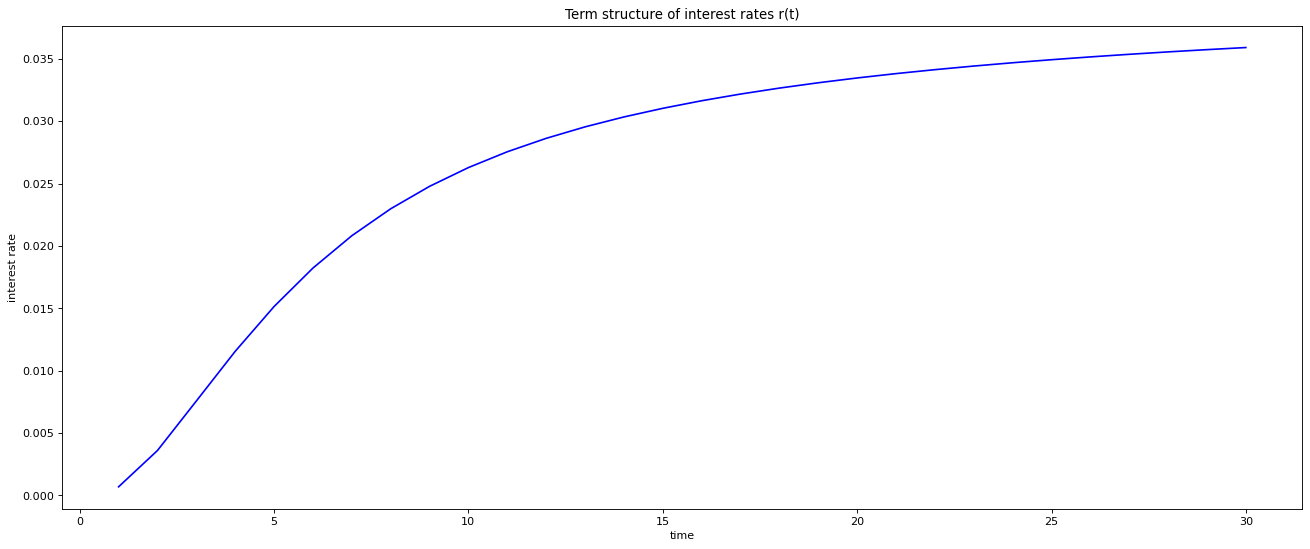

In [38]:
t=list(range(1,31))
plot_r=[]
for i in range(1,31):
    plot_r.append(r(i))

plt.figure(figsize=(20,8),dpi=80)

plt.plot(t,plot_r,'b')
plt.title('Term structure of interest rates r(t)')
plt.xlabel("time")
plt.ylabel("interest rate")

## z

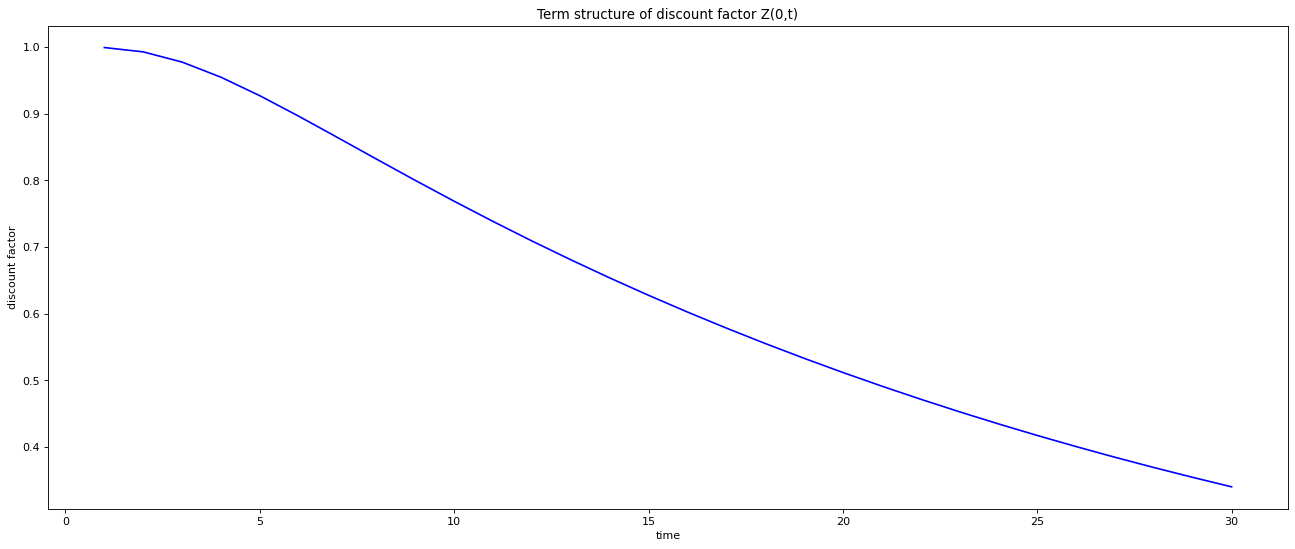

In [39]:
plot_z=[]
for i in range(1,31):
    plot_z.append(z(i))

plt.figure(figsize=(20,8),dpi=80)

plt.plot(t,plot_z,'b')
plt.title('Term structure of discount factor Z(0,t)')
plt.xlabel("time")
plt.ylabel("discount factor")

## h

[0.018739616818661795, 0.019369333650527797, 0.01979114524288611, 0.021416395135167455, 0.02238560334042459, 0.024139373192806155, 0.02883369086668724, 0.034537912168566255, 0.034674123961084075, 0.03523129026761347]
              h(t)
t(years)          
1         0.018740
2         0.019369
3         0.019791
4         0.021416
5         0.022386
6         0.024139
7         0.028834
8         0.034538
9         0.034674
10        0.035231


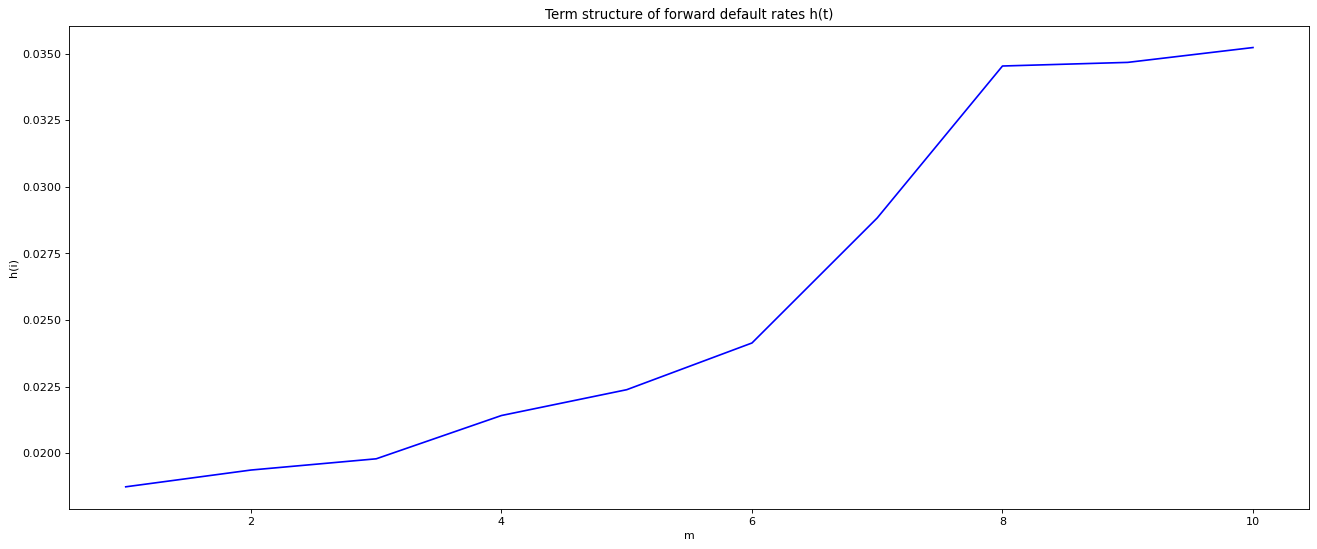

In [44]:
m=list(range(1,11))
h=[h1,h2,h3,h4,h5,h6,h7,h8,h9,h10]

plt.figure(figsize=(20,8),dpi=80)

plt.plot(m,h,'b')
plt.title('Term structure of forward default rates h(t)')
plt.xlabel("m")
plt.ylabel("h(i)")
print(h)

s = np.array(list(range(1,11)))
data = {'t(years)': s, 'h(t)': h}
df = pd.DataFrame(data).set_index('t(years)')
print(df)


## Q

              Q(t)
t(years)          
0         1.000000
1         0.981171
2         0.961971
3         0.941724
4         0.920967
5         0.899181
6         0.872596
7         0.847795
8         0.819780
9         0.791949
10        0.765064
11        0.739011
12        0.713826
13        0.689499
14        0.666001
15        0.643304
16        0.621380
17        0.600203
18        0.579748
19        0.559991
20        0.540906
21        0.522282
22        0.504202
23        0.486748
24        0.469897
25        0.453631
26        0.437927
27        0.422767
28        0.408131
29        0.394003
30        0.380363


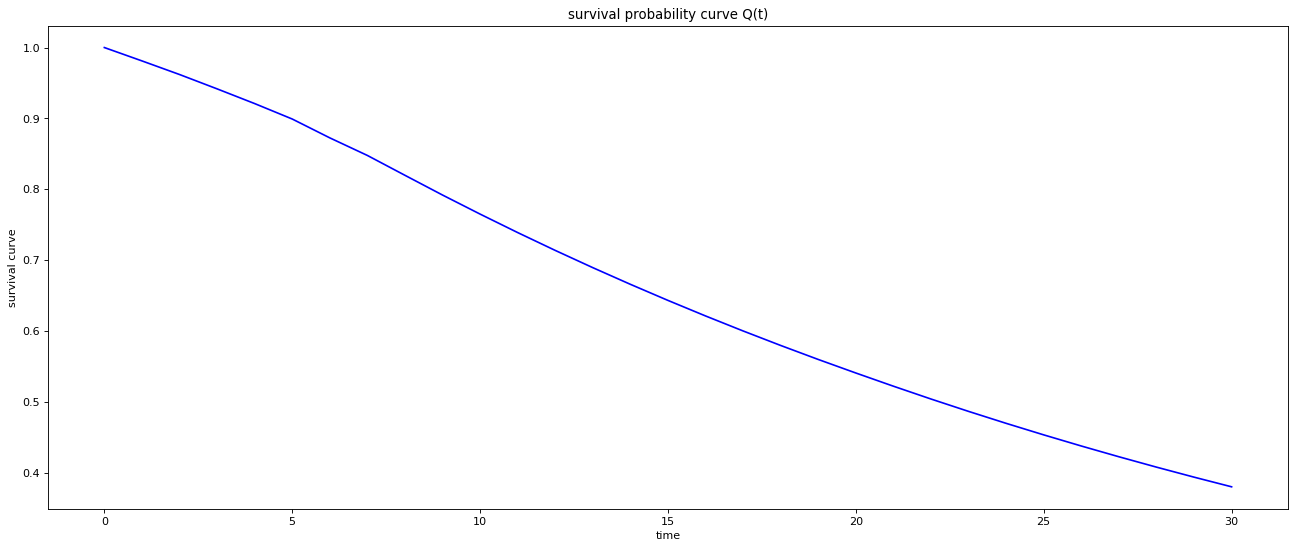

In [48]:
plot_q=[]
t=list(range(0,31))
for i in range(0,31):
    plot_q.append(Qnew(i))

plt.figure(figsize=(20,8),dpi=80)

plt.plot(t,plot_q,'b')

plt.title('survival probability curve Q(t)')
plt.xlabel("time")
plt.ylabel("survival curve")

s = np.array(list(range(0,31)))
data = {'t(years)': s, 'Q(t)': plot_q}
df = pd.DataFrame(data).set_index('t(years)')
print(df)


## tables

In [99]:
data1=pd.DataFrame()
data1['t']=t
data1['interest rate']=plot_r
data1['discount factor']=plot_z
data1['survival probability']=plot_q


In [100]:
data2=pd.DataFrame()
data2['m']=m
data2['h']=h

In [49]:
ai=-spread*(-price_ttm_diff[0])
clean_value=value-ai

In [50]:
ai

-0.030883333333333336

In [51]:
clean_value

-0.06883806043318587